# An√°lise de Vendas 

## Equipe:

- Danillo Coelho
- Filipe Rodrigues
- Gabriel Maca√∫bas
- Lucas Andrade

## Instalando depend√™ncias

In [2]:
!pip install psycopg2-binary matplotlib seaborn plotly

   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3.0/3.0 MB 934.7 kB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 9.8/9.8 MB 6.0 MB/s eta 0:00:0000:0100:01
   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 407.3/407.3 kB 12.2 MB/s eta 0:00:00


## Inicializando banco

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sqlalchemy import create_engine, text
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo dos gr√°ficos
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# ajuste conforme suas credenciais do container
USER = "user"
PASSWORD = "password"
HOST = "postgres"
PORT = "5432"
DB = "mydatabase"

# Criar conex√£o com par√¢metros espec√≠ficos para evitar o erro do immutabledict
engine = create_engine(
    f"postgresql://{USER}:{PASSWORD}@{HOST}:{PORT}/{DB}",
    echo=False,
    future=True
)

# Fun√ß√£o helper para executar queries com tratamento de erro
def execute_query(query_string):
    """Executa query SQL usando text() para evitar problemas de par√¢metros"""
    try:
        with engine.connect() as conn:
            return pd.read_sql(text(query_string), conn)
    except Exception as e:
        print(f"Erro ao executar query: {e}")
        return pd.DataFrame()

print("‚úÖ Bibliotecas carregadas e conex√£o com banco estabelecida!")

‚úÖ Bibliotecas carregadas e conex√£o com banco estabelecida!


## 1 - Quem s√£o os meus 10 maiores clientes, em termos de vendas ($)?

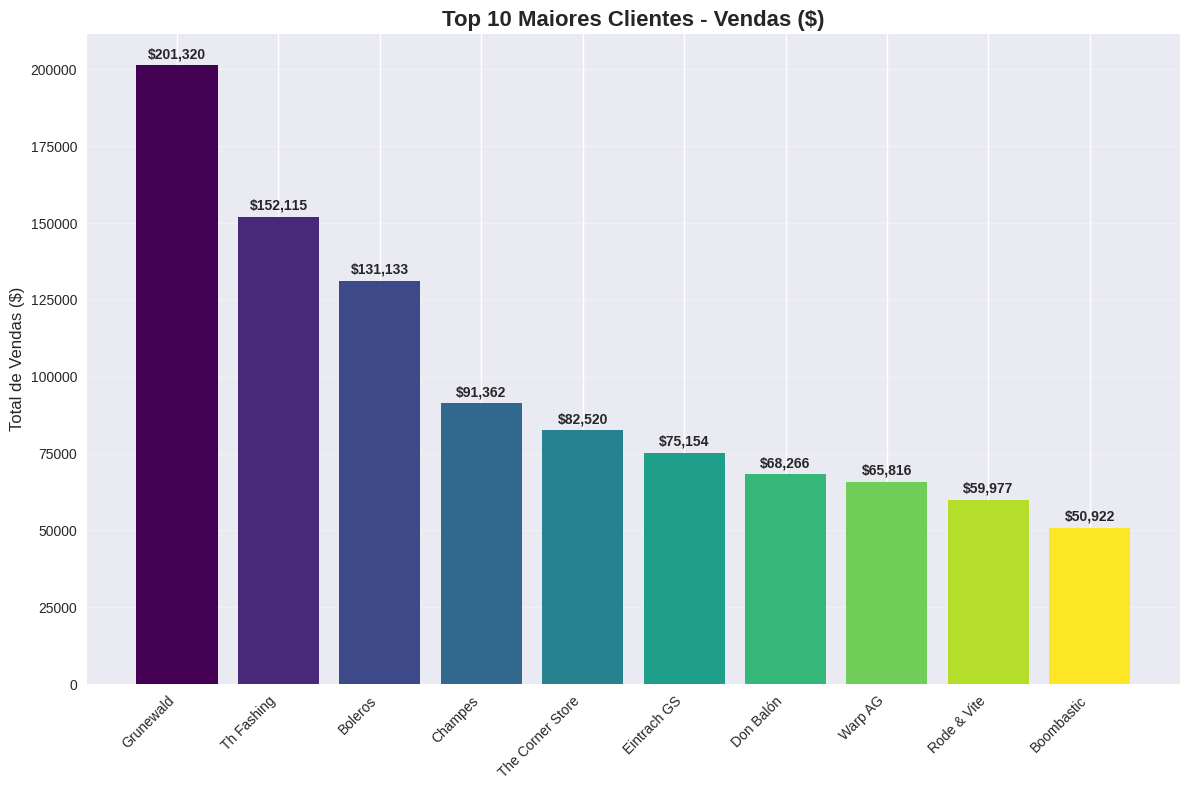


RESUMO - Top 10 Maiores Clientes:
   ‚Ä¢ Total de vendas dos top 10: $978,585.17
   ‚Ä¢ Maior cliente: Grunewald ($201,320.49)
   ‚Ä¢ Menor do top 10: Boombastic ($50,922.49)
   ‚Ä¢ Diferen√ßa entre 1¬∫ e 10¬∫: $150,398.00
   ‚Ä¢ Participa√ß√£o do maior cliente: 20.6%


In [25]:
query_maiores_clientes_vendas = """
SELECT
    c.nome,
    SUM(v.valor_vendas) AS valor
FROM clientes c
JOIN pedidos p ON p.cliente_id = c.id
JOIN vendas v ON v.pedido_id = p.id
GROUP BY (c.nome)
ORDER BY SUM(v.valor_vendas) DESC
LIMIT 10;
"""

df_maiores_clientes_vendas = execute_query(query_maiores_clientes_vendas)
df_maiores_clientes_vendas

# Gr√°fico de barras verticais - Top 10 Maiores Clientes
plt.figure(figsize=(12, 8))

bars = plt.bar(range(len(df_maiores_clientes_vendas)), df_maiores_clientes_vendas['valor'], 
               color=plt.cm.viridis(np.linspace(0, 1, len(df_maiores_clientes_vendas))))
plt.xticks(range(len(df_maiores_clientes_vendas)), df_maiores_clientes_vendas['nome'], rotation=45, ha='right')
plt.title('Top 10 Maiores Clientes - Vendas ($)', fontsize=16, fontweight='bold')
plt.ylabel('Total de Vendas ($)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.annotate(f'${height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

# Resumo estat√≠stico
print(f"\nRESUMO - Top 10 Maiores Clientes:")
print(f"   ‚Ä¢ Total de vendas dos top 10: ${df_maiores_clientes_vendas['valor'].sum():,.2f}")
print(f"   ‚Ä¢ Maior cliente: {df_maiores_clientes_vendas.iloc[0]['nome']} (${df_maiores_clientes_vendas.iloc[0]['valor']:,.2f})")
print(f"   ‚Ä¢ Menor do top 10: {df_maiores_clientes_vendas.iloc[9]['nome']} (${df_maiores_clientes_vendas.iloc[9]['valor']:,.2f})")
print(f"   ‚Ä¢ Diferen√ßa entre 1¬∫ e 10¬∫: ${df_maiores_clientes_vendas.iloc[0]['valor'] - df_maiores_clientes_vendas.iloc[9]['valor']:,.2f}")
print(f"   ‚Ä¢ Participa√ß√£o do maior cliente: {(df_maiores_clientes_vendas.iloc[0]['valor']/df_maiores_clientes_vendas['valor'].sum())*100:.1f}%")

## 2 - Quais os tr√™s maiores pa√≠ses, em termos de vendas ($)?

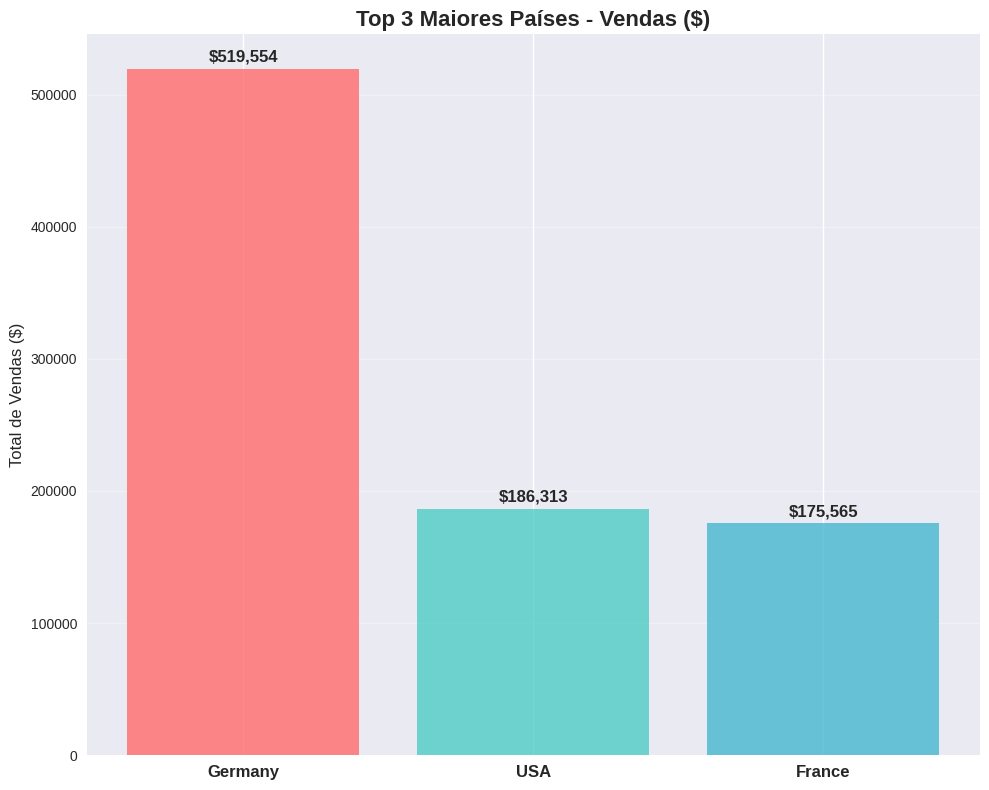


RESUMO - Top 3 Maiores Pa√≠ses:
   ‚Ä¢ Total de vendas dos top 3: $881,432.46
   ‚Ä¢ 1¬∫ lugar: Germany ($519,553.87)
   ‚Ä¢ 2¬∫ lugar: USA ($186,313.27)
   ‚Ä¢ 3¬∫ lugar: France ($175,565.32)
   ‚Ä¢ Participa√ß√£o do 1¬∫ lugar: 58.9%


In [26]:
query_tres_maiores_paises_vendas = """
SELECT
    pa.nome AS pais,
    SUM(v.valor_vendas) AS valor
FROM clientes c
JOIN pedidos p ON p.cliente_id = c.id
JOIN vendas v ON v.pedido_id = p.id
JOIN paises pa ON c.pais_id = pa.id
GROUP BY (pa.nome)
ORDER BY SUM(v.valor_vendas) DESC
LIMIT 3;
"""

df_tres_maiores_paises_vendas = execute_query(query_tres_maiores_paises_vendas)
df_tres_maiores_paises_vendas

# Gr√°fico de barras verticais - Top 3 Maiores Pa√≠ses
plt.figure(figsize=(10, 8))

bars = plt.bar(range(len(df_tres_maiores_paises_vendas)), df_tres_maiores_paises_vendas['valor'], 
               color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
plt.xticks(range(len(df_tres_maiores_paises_vendas)), df_tres_maiores_paises_vendas['pais'], 
           fontsize=12, fontweight='bold')
plt.title('Top 3 Maiores Pa√≠ses - Vendas ($)', fontsize=16, fontweight='bold')
plt.ylabel('Total de Vendas ($)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.annotate(f'${height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

# Resumo estat√≠stico
print(f"\nRESUMO - Top 3 Maiores Pa√≠ses:")
print(f"   ‚Ä¢ Total de vendas dos top 3: ${df_tres_maiores_paises_vendas['valor'].sum():,.2f}")
print(f"   ‚Ä¢ 1¬∫ lugar: {df_tres_maiores_paises_vendas.iloc[0]['pais']} (${df_tres_maiores_paises_vendas.iloc[0]['valor']:,.2f})")
print(f"   ‚Ä¢ 2¬∫ lugar: {df_tres_maiores_paises_vendas.iloc[1]['pais']} (${df_tres_maiores_paises_vendas.iloc[1]['valor']:,.2f})")
print(f"   ‚Ä¢ 3¬∫ lugar: {df_tres_maiores_paises_vendas.iloc[2]['pais']} (${df_tres_maiores_paises_vendas.iloc[2]['valor']:,.2f})")
print(f"   ‚Ä¢ Participa√ß√£o do 1¬∫ lugar: {(df_tres_maiores_paises_vendas.iloc[0]['valor']/df_tres_maiores_paises_vendas['valor'].sum())*100:.1f}%")

## 3 - Quais as categorias de produtos que geram maior faturamento (vendas $) no Brasil?

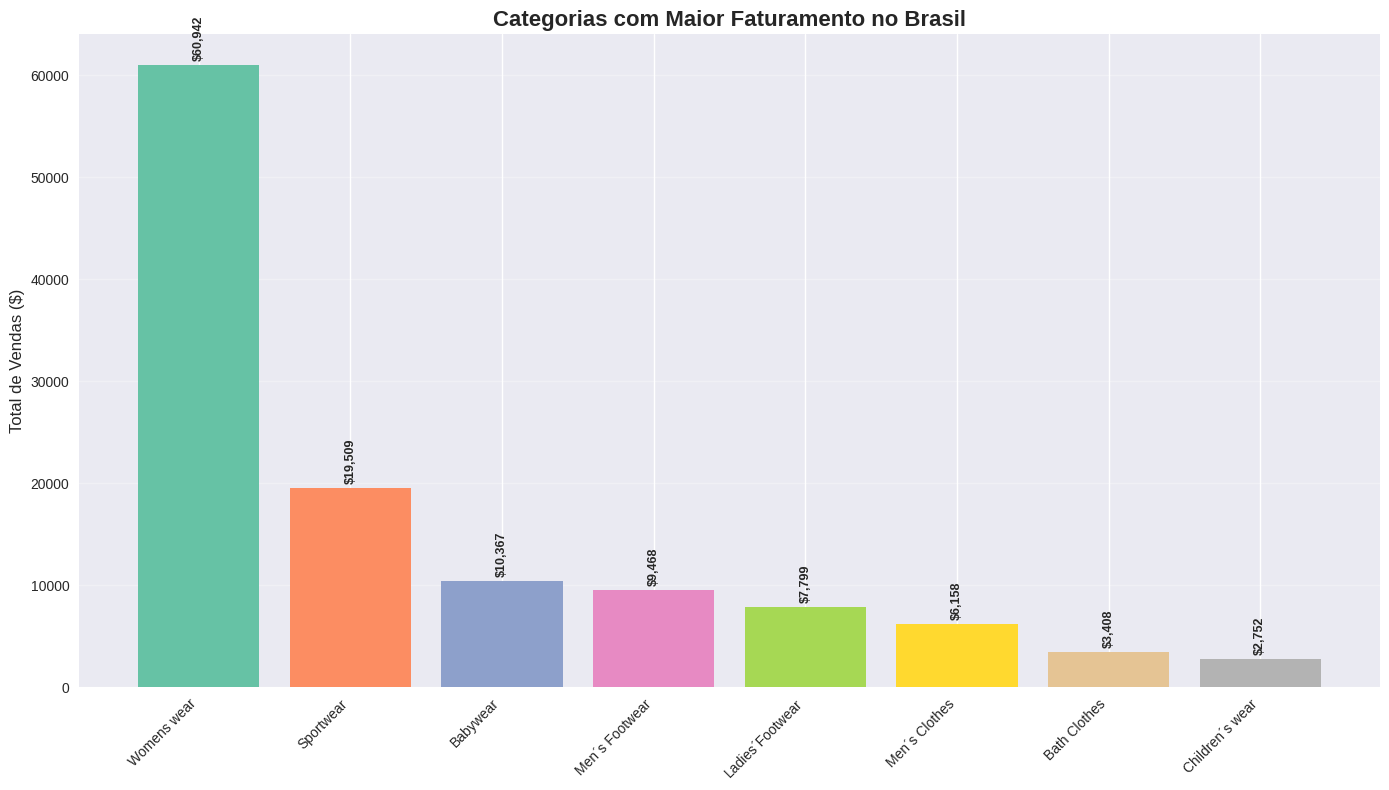


RESUMO - Categorias no Brasil:
   ‚Ä¢ Total de categorias: 8
   ‚Ä¢ Faturamento total no Brasil: $120,402.85
   ‚Ä¢ Categoria l√≠der: Womens wear ($60,941.74)
   ‚Ä¢ 2¬™ categoria: Sportwear ($19,509.42)
   ‚Ä¢ 3¬™ categoria: Babywear ($10,367.21)
   ‚Ä¢ Participa√ß√£o da categoria l√≠der: 50.6%


In [27]:
query_categorias_maior_faturamento = """
SELECT
    ca.nome AS categoria,
    SUM(v.valor_vendas) AS valor
FROM vendas v
JOIN produtos pd ON v.produto_id = pd.id
JOIN categorias ca ON pd.categoria_id = ca.id
JOIN pedidos pe ON v.pedido_id = pe.id
JOIN clientes cl ON pe.cliente_id = cl.id
WHERE cl.pais_id = 'BRA'
GROUP BY (ca.nome)
ORDER BY SUM(v.valor_vendas) DESC;
"""

df_categorias_maior_faturamento = execute_query(query_categorias_maior_faturamento)
df_categorias_maior_faturamento

# Gr√°fico de barras verticais - Categorias com Maior Faturamento no Brasil
plt.figure(figsize=(14, 8))

bars = plt.bar(range(len(df_categorias_maior_faturamento)), df_categorias_maior_faturamento['valor'], 
               color=plt.cm.Set2(np.linspace(0, 1, len(df_categorias_maior_faturamento))))
plt.xticks(range(len(df_categorias_maior_faturamento)), df_categorias_maior_faturamento['categoria'], 
           rotation=45, ha='right', fontsize=10)
plt.title('Categorias com Maior Faturamento no Brasil', fontsize=16, fontweight='bold')
plt.ylabel('Total de Vendas ($)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.annotate(f'${height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=90)

plt.tight_layout()
plt.show()

# Resumo estat√≠stico
print(f"\nRESUMO - Categorias no Brasil:")
print(f"   ‚Ä¢ Total de categorias: {len(df_categorias_maior_faturamento)}")
print(f"   ‚Ä¢ Faturamento total no Brasil: ${df_categorias_maior_faturamento['valor'].sum():,.2f}")
print(f"   ‚Ä¢ Categoria l√≠der: {df_categorias_maior_faturamento.iloc[0]['categoria']} (${df_categorias_maior_faturamento.iloc[0]['valor']:,.2f})")
if len(df_categorias_maior_faturamento) > 1:
    print(f"   ‚Ä¢ 2¬™ categoria: {df_categorias_maior_faturamento.iloc[1]['categoria']} (${df_categorias_maior_faturamento.iloc[1]['valor']:,.2f})")
if len(df_categorias_maior_faturamento) > 2:
    print(f"   ‚Ä¢ 3¬™ categoria: {df_categorias_maior_faturamento.iloc[2]['categoria']} (${df_categorias_maior_faturamento.iloc[2]['valor']:,.2f})")
print(f"   ‚Ä¢ Participa√ß√£o da categoria l√≠der: {(df_categorias_maior_faturamento.iloc[0]['valor']/df_categorias_maior_faturamento['valor'].sum())*100:.1f}%")

## 4 - Qual a despesa com frete envolvendo cada transportadora?

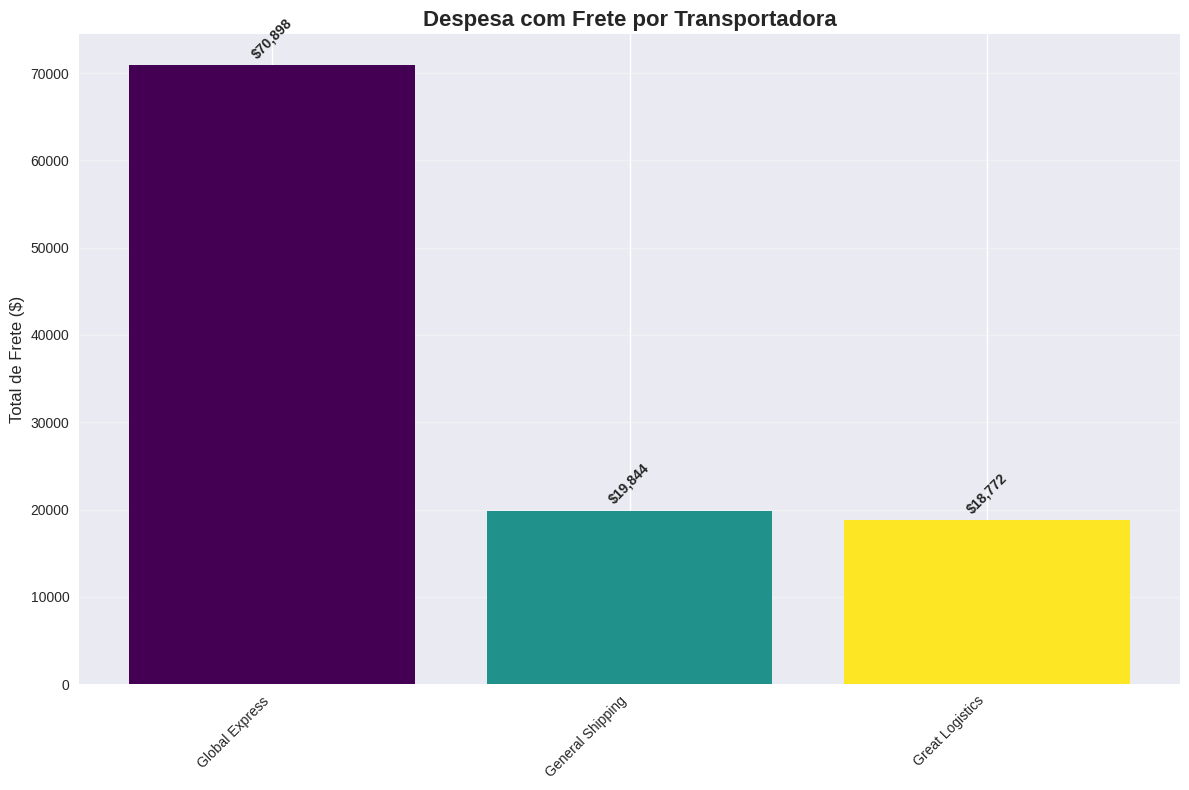


RESUMO - Despesas com Frete:
   ‚Ä¢ Total de transportadoras: 3
   ‚Ä¢ Despesa total com frete: $109,513.34
   ‚Ä¢ Transportadora com maior custo: Global Express ($70,897.82)
   ‚Ä¢ Transportadora com menor custo: Great Logistics ($18,771.69)
   ‚Ä¢ Participa√ß√£o da mais cara: 64.7%


In [29]:
query_despesa_frete_transportadora = """
SELECT
    t.nome AS transportadora,
    SUM(v.frete) AS total_frete
FROM vendas v
JOIN transportadoras t ON v.transportadora_id = t.id
GROUP BY t.nome
ORDER BY SUM(v.frete) DESC;
"""

df_despesa_frete_transportadora = execute_query(query_despesa_frete_transportadora)
df_despesa_frete_transportadora

# Gr√°fico de barras verticais - Despesa com Frete por Transportadora
plt.figure(figsize=(12, 8))

bars = plt.bar(range(len(df_despesa_frete_transportadora)), df_despesa_frete_transportadora['total_frete'], 
               color=plt.cm.viridis(np.linspace(0, 1, len(df_despesa_frete_transportadora))))
plt.xticks(range(len(df_despesa_frete_transportadora)), df_despesa_frete_transportadora['transportadora'], 
           rotation=45, ha='right')
plt.title('Despesa com Frete por Transportadora', fontsize=16, fontweight='bold')
plt.ylabel('Total de Frete ($)', fontsize=12)
plt.grid(True, alpha=0.3, axis='y')

# Adicionar valores nas barras
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.annotate(f'${height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=45)

plt.tight_layout()
plt.show()

# Gr√°fico de pizza para distribui√ß√£o percentual
fig_pie = px.pie(df_despesa_frete_transportadora, values='total_frete', names='transportadora', 
                 title='Distribui√ß√£o das Despesas de Frete por Transportadora')
fig_pie.update_traces(textposition='inside', textinfo='percent+label')
fig_pie.update_layout(font=dict(size=12))
fig_pie.show()

# Resumo estat√≠stico
print(f"\nRESUMO - Despesas com Frete:")
print(f"   ‚Ä¢ Total de transportadoras: {len(df_despesa_frete_transportadora)}")
print(f"   ‚Ä¢ Despesa total com frete: ${df_despesa_frete_transportadora['total_frete'].sum():,.2f}")
print(f"   ‚Ä¢ Transportadora com maior custo: {df_despesa_frete_transportadora.iloc[0]['transportadora']} (${df_despesa_frete_transportadora.iloc[0]['total_frete']:,.2f})")
if len(df_despesa_frete_transportadora) > 1:
    print(f"   ‚Ä¢ Transportadora com menor custo: {df_despesa_frete_transportadora.iloc[-1]['transportadora']} (${df_despesa_frete_transportadora.iloc[-1]['total_frete']:,.2f})")
print(f"   ‚Ä¢ Participa√ß√£o da mais cara: {(df_despesa_frete_transportadora.iloc[0]['total_frete']/df_despesa_frete_transportadora['total_frete'].sum())*100:.1f}%")

## 5 - Quais s√£o os principais clientes (vendas $) do segmento ‚ÄúCal√ßados Masculinos‚Äù (Men ÃÅs Footwear) na Alemanha?

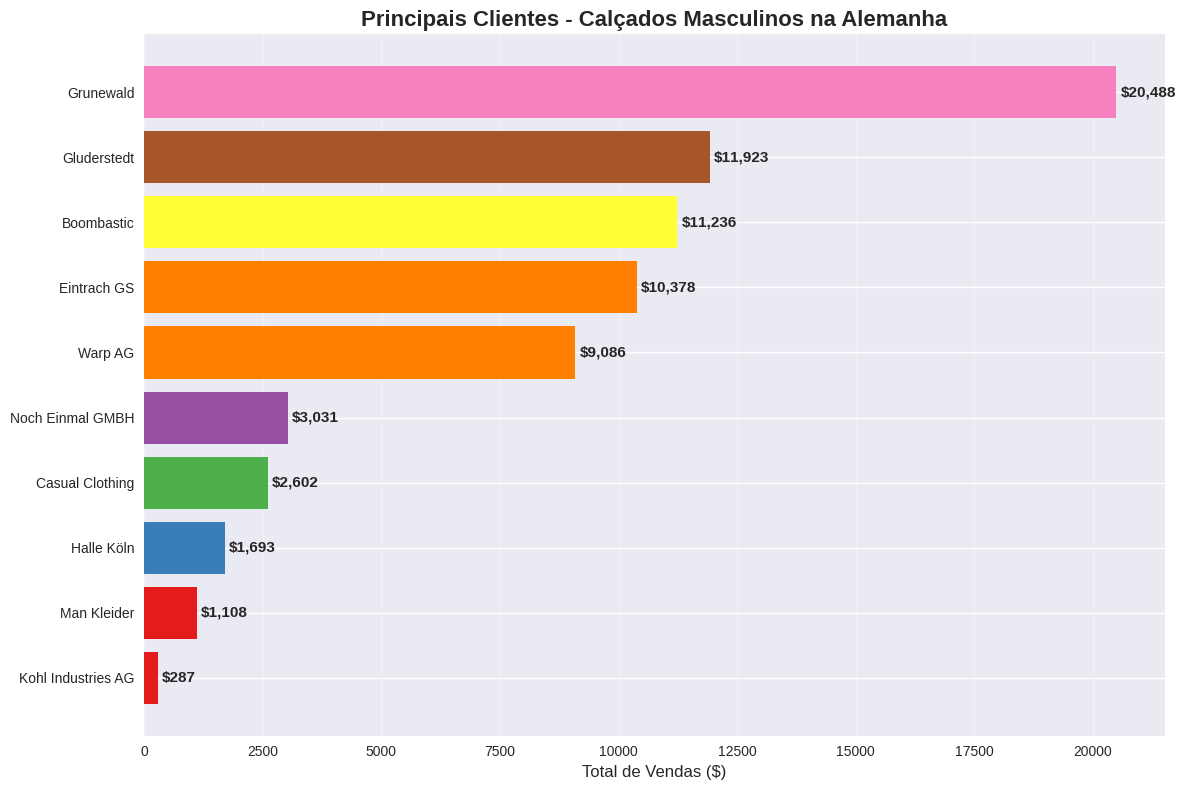


RESUMO - Cal√ßados Masculinos na Alemanha:
   ‚Ä¢ Total de clientes: 10
   ‚Ä¢ Faturamento total: $71,831.75
   ‚Ä¢ Principal cliente: Kohl Industries AG ($286.56)
   ‚Ä¢ 2¬∫ cliente: Man Kleider ($1,108.00)
   ‚Ä¢ Participa√ß√£o do principal: 0.4%


In [31]:
query_clientes_calcados_alemanha = """
SELECT
    c.nome AS cliente,
    SUM(v.valor_vendas) AS total_vendas
FROM vendas v
JOIN pedidos p ON v.pedido_id = p.id
JOIN clientes c ON p.cliente_id = c.id
JOIN produtos pr ON v.produto_id = pr.id
JOIN categorias cat ON pr.categoria_id = cat.id
JOIN paises pa ON c.pais_id = pa.id
WHERE cat.nome = 'Men¬¥s Footwear'
  AND pa.nome = 'Germany'
GROUP BY c.nome
ORDER BY total_vendas ASC;
"""

df_clientes_calcados_alemanha = pd.read_sql(query_clientes_calcados_alemanha, engine)
df_clientes_calcados_alemanha

# Gr√°fico de barras horizontais - Clientes de Cal√ßados Masculinos na Alemanha
plt.figure(figsize=(12, 8))

if len(df_clientes_calcados_alemanha) > 0:
    top_clientes = df_clientes_calcados_alemanha.head(10)  # Top 10 se houver muitos
    bars = plt.barh(range(len(top_clientes)), top_clientes['total_vendas'], 
                    color=plt.cm.Set1(np.linspace(0, 1, len(top_clientes) + 2)))
    plt.yticks(range(len(top_clientes)), top_clientes['cliente'])
    plt.title('Principais Clientes - Cal√ßados Masculinos na Alemanha', fontsize=16, fontweight='bold')
    plt.xlabel('Total de Vendas ($)', fontsize=12)
    plt.grid(True, alpha=0.3, axis='x')
    
    # Adicionar valores nas barras
    for i, bar in enumerate(bars):
        width = bar.get_width()
        plt.annotate(f'${width:,.0f}',
                    xy=(width, bar.get_y() + bar.get_height() / 2),
                    xytext=(3, 0), textcoords="offset points",
                    ha='left', va='center', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Resumo estat√≠stico
    print(f"\nRESUMO - Cal√ßados Masculinos na Alemanha:")
    print(f"   ‚Ä¢ Total de clientes: {len(df_clientes_calcados_alemanha)}")
    print(f"   ‚Ä¢ Faturamento total: ${df_clientes_calcados_alemanha['total_vendas'].sum():,.2f}")
    print(f"   ‚Ä¢ Principal cliente: {df_clientes_calcados_alemanha.iloc[0]['cliente']} (${df_clientes_calcados_alemanha.iloc[0]['total_vendas']:,.2f})")
    if len(df_clientes_calcados_alemanha) > 1:
        print(f"   ‚Ä¢ 2¬∫ cliente: {df_clientes_calcados_alemanha.iloc[1]['cliente']} (${df_clientes_calcados_alemanha.iloc[1]['total_vendas']:,.2f})")
    print(f"   ‚Ä¢ Participa√ß√£o do principal: {(df_clientes_calcados_alemanha.iloc[0]['total_vendas']/df_clientes_calcados_alemanha['total_vendas'].sum())*100:.1f}%")
else:
    plt.text(0.5, 0.5, 'Nenhum cliente encontrado\npara Cal√ßados Masculinos na Alemanha', 
             ha='center', va='center', transform=plt.gca().transAxes, fontsize=16, 
             bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.5))
    plt.title('üá©üá™ Principais Clientes - Cal√ßados Masculinos na Alemanha', fontsize=16, fontweight='bold')
    plt.show()
    print("Nenhum registro encontrado para Cal√ßados Masculinos na Alemanha")

## 6 - Quais os vendedores que mais d√£o descontos nos Estados Unidos?

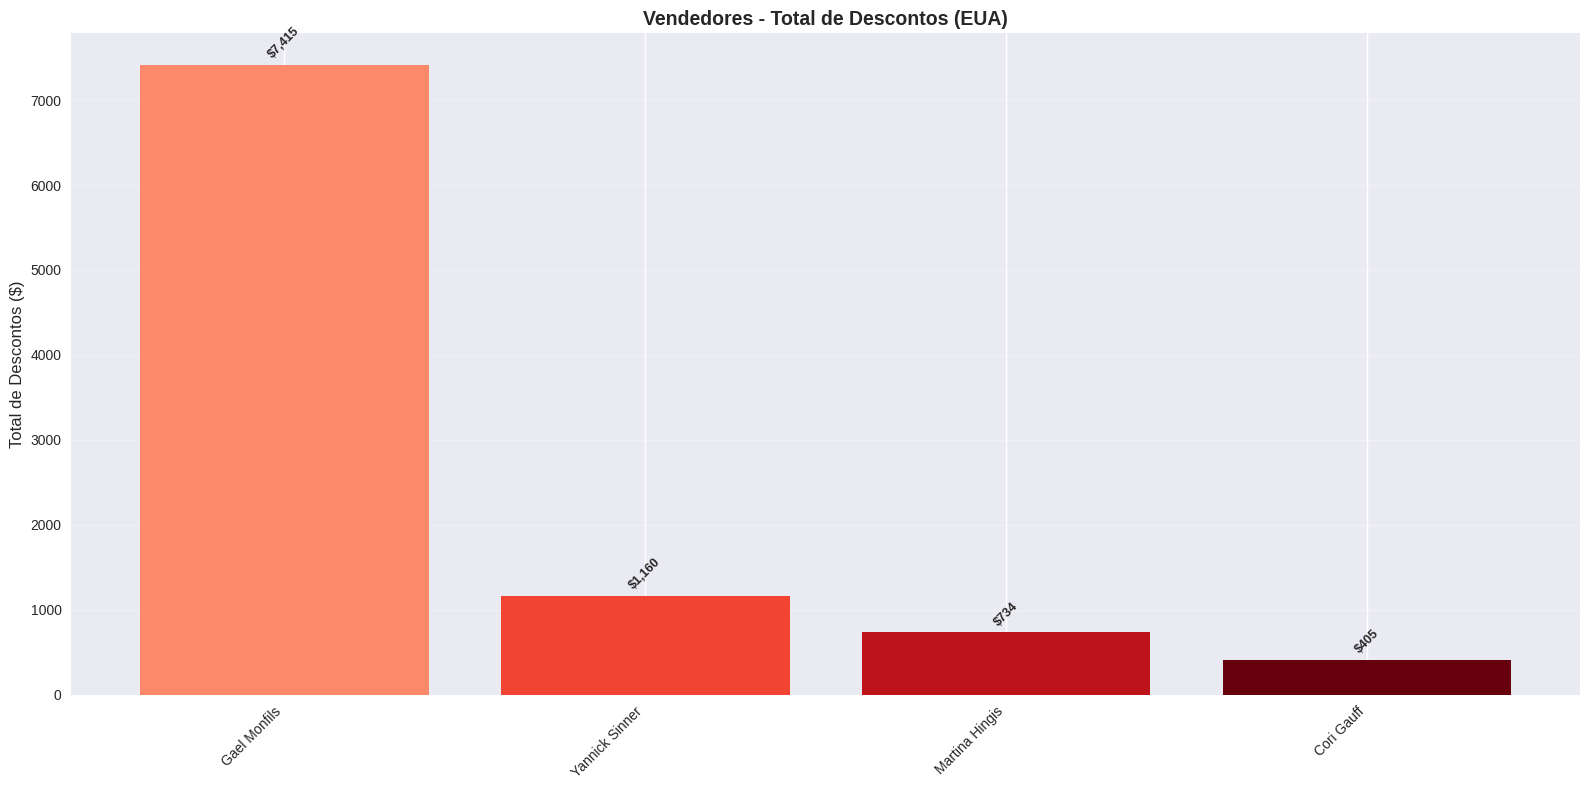


RESUMO - Descontos nos EUA:
   ‚Ä¢ Total de vendedores que d√£o desconto: 4
   ‚Ä¢ Total de descontos concedidos: $9,713.56
   ‚Ä¢ Vendedor que mais d√° desconto: Gael Monfils ($7,415.17)
   ‚Ä¢ N√∫mero de vendas com desconto: 85


In [34]:
query_vendedores_descontos_eua = """
SELECT
    ve.nome AS vendedor,
    SUM(v.desconto) AS total_descontos,
    COUNT(v.id) AS num_vendas
FROM vendas v
JOIN pedidos p ON v.pedido_id = p.id
JOIN vendedores ve ON p.vendedor_id = ve.id
JOIN clientes c ON p.cliente_id = c.id
JOIN paises pa ON c.pais_id = pa.id
WHERE pa.nome = 'USA'
  AND v.desconto > 0
GROUP BY ve.nome
ORDER BY total_descontos DESC;
"""

df_vendedores_descontos_eua = pd.read_sql(query_vendedores_descontos_eua, engine)
df_vendedores_descontos_eua

# Gr√°ficos para an√°lise de descontos
fig, (ax1) = plt.subplots(1, figsize=(16, 8))

if len(df_vendedores_descontos_eua) > 0:
    # Gr√°fico 1: Total de descontos por vendedor
    top_10_vendedores = df_vendedores_descontos_eua.head(10)
    bars1 = ax1.bar(range(len(top_10_vendedores)), top_10_vendedores['total_descontos'], 
                    color=plt.cm.Reds(np.linspace(0.4, 1, len(top_10_vendedores))))
    ax1.set_xticks(range(len(top_10_vendedores)))
    ax1.set_xticklabels(top_10_vendedores['vendedor'], rotation=45, ha='right')
    ax1.set_title('Vendedores - Total de Descontos (EUA)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Total de Descontos ($)', fontsize=12)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Adicionar valores nas barras
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax1.annotate(f'${height:,.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Resumo estat√≠stico
    print(f"\nRESUMO - Descontos nos EUA:")
    print(f"   ‚Ä¢ Total de vendedores que d√£o desconto: {len(df_vendedores_descontos_eua)}")
    print(f"   ‚Ä¢ Total de descontos concedidos: ${df_vendedores_descontos_eua['total_descontos'].sum():,.2f}")
    print(f"   ‚Ä¢ Vendedor que mais d√° desconto: {df_vendedores_descontos_eua.iloc[0]['vendedor']} (${df_vendedores_descontos_eua.iloc[0]['total_descontos']:,.2f})")
    print(f"   ‚Ä¢ N√∫mero de vendas com desconto: {df_vendedores_descontos_eua.iloc[0]['num_vendas']}")
    
else:
    ax1.text(0.5, 0.5, 'Nenhum desconto encontrado nos EUA', 
             ha='center', va='center', transform=ax1.transAxes, fontsize=14)
    ax2.text(0.5, 0.5, 'Nenhum desconto encontrado nos EUA', 
             ha='center', va='center', transform=ax2.transAxes, fontsize=14)
    plt.show()
    print("Nenhum registro de descontos encontrado nos EUA")

## 7 - Quais os fornecedores que d√£o a maior margem de lucro ($) no segmento de ‚ÄúVestu√°rio Feminino‚Äù (Womens wear)?

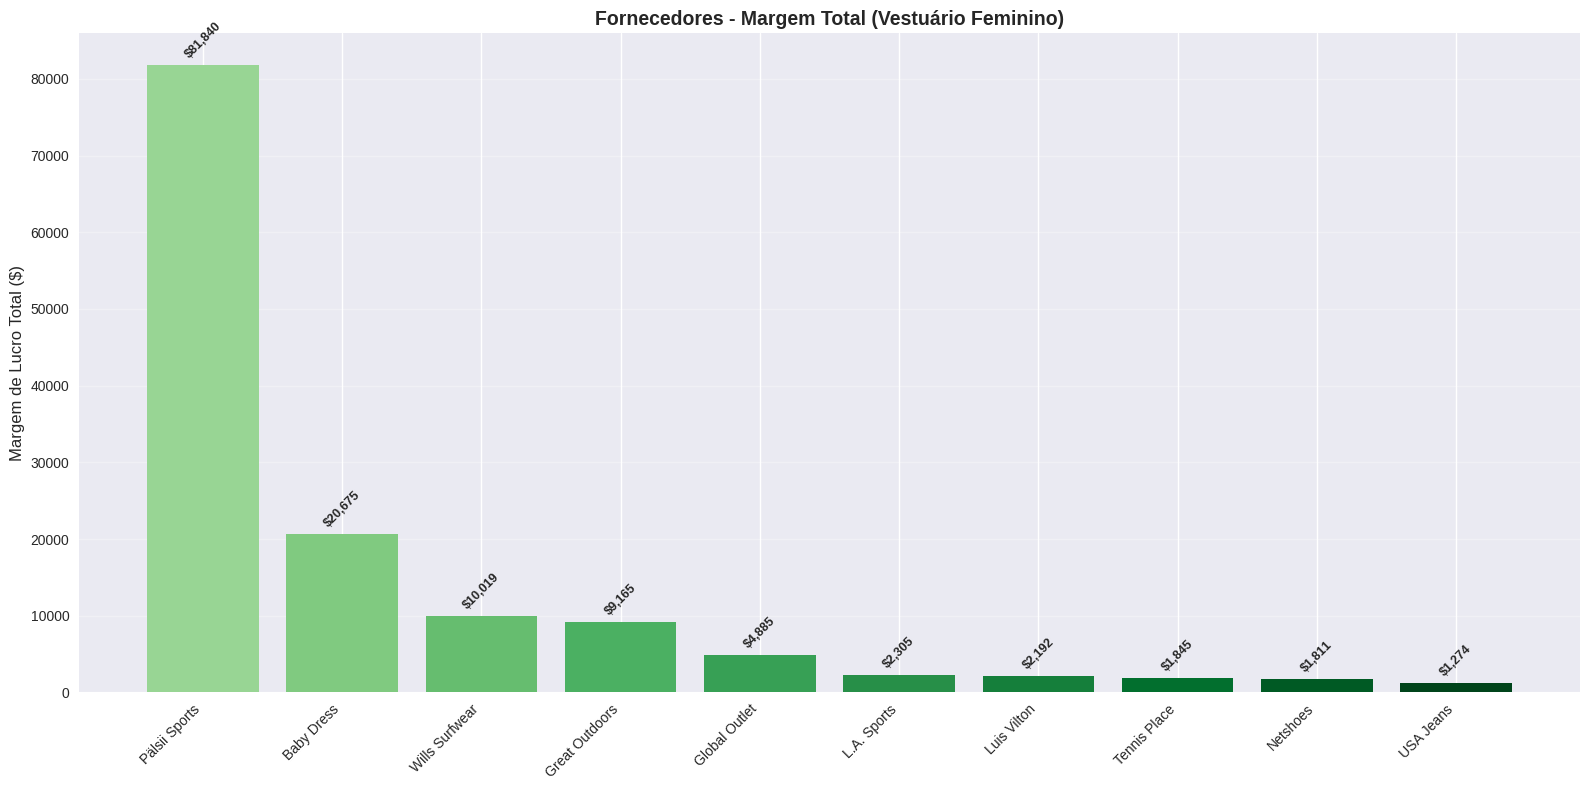


RESUMO - Vestu√°rio Feminino:
   ‚Ä¢ Total de fornecedores: 11
   ‚Ä¢ Margem total do segmento: $136,158.94
   ‚Ä¢ Melhor fornecedor: P√§lsii Sports ($81,839.96)
   ‚Ä¢ N√∫mero de vendas do l√≠der: 39
   ‚Ä¢ Participa√ß√£o do l√≠der: 60.1%


In [33]:
query_fornecedores_margem_vestuario_feminino = """
SELECT
    f.nome AS fornecedor,
    SUM(v.margem_bruta) AS margem_total,
    COUNT(v.id) AS num_vendas
FROM vendas v
JOIN produtos p ON v.produto_id = p.id
JOIN fornecedores f ON p.fornecedor_id = f.id
JOIN categorias cat ON p.categoria_id = cat.id
WHERE cat.nome ILIKE %s OR cat.nome ILIKE %s
GROUP BY f.nome
ORDER BY margem_total DESC;
"""

# Definindo os par√¢metros
params = ('%women%', '%feminino%')

# Executando a consulta com par√¢metros
df_fornecedores_margem_vestuario_feminino = pd.read_sql(query_fornecedores_margem_vestuario_feminino, engine, params=params)

df_fornecedores_margem_vestuario_feminino

# Gr√°ficos para an√°lise de margem de lucro
fig, (ax1) = plt.subplots(1, figsize=(16, 8))

if len(df_fornecedores_margem_vestuario_feminino) > 0:
    # Gr√°fico 1: Margem total por fornecedor
    top_10_fornecedores = df_fornecedores_margem_vestuario_feminino.head(10)
    bars1 = ax1.bar(range(len(top_10_fornecedores)), top_10_fornecedores['margem_total'], 
                    color=plt.cm.Greens(np.linspace(0.4, 1, len(top_10_fornecedores))))
    ax1.set_xticks(range(len(top_10_fornecedores)))
    ax1.set_xticklabels(top_10_fornecedores['fornecedor'], rotation=45, ha='right')
    ax1.set_title('Fornecedores - Margem Total (Vestu√°rio Feminino)', fontsize=14, fontweight='bold')
    ax1.set_ylabel('Margem de Lucro Total ($)', fontsize=12)
    ax1.grid(True, alpha=0.3, axis='y')
    
    # Adicionar valores nas barras
    for i, bar in enumerate(bars1):
        height = bar.get_height()
        ax1.annotate(f'${height:,.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=9, fontweight='bold', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    # Gr√°fico de pizza para distribui√ß√£o da margem
    fig_pie = px.pie(top_10_fornecedores, values='margem_total', names='fornecedor', 
                     title='Distribui√ß√£o da Margem de Lucro - Vestu√°rio Feminino')
    fig_pie.update_traces(textposition='inside', textinfo='percent+label')
    fig_pie.update_layout(font=dict(size=12))
    fig_pie.show()
    
    # Resumo estat√≠stico
    print(f"\nRESUMO - Vestu√°rio Feminino:")
    print(f"   ‚Ä¢ Total de fornecedores: {len(df_fornecedores_margem_vestuario_feminino)}")
    print(f"   ‚Ä¢ Margem total do segmento: ${df_fornecedores_margem_vestuario_feminino['margem_total'].sum():,.2f}")
    print(f"   ‚Ä¢ Melhor fornecedor: {df_fornecedores_margem_vestuario_feminino.iloc[0]['fornecedor']} (${df_fornecedores_margem_vestuario_feminino.iloc[0]['margem_total']:,.2f})")
    print(f"   ‚Ä¢ N√∫mero de vendas do l√≠der: {df_fornecedores_margem_vestuario_feminino.iloc[0]['num_vendas']}")
    print(f"   ‚Ä¢ Participa√ß√£o do l√≠der: {(df_fornecedores_margem_vestuario_feminino.iloc[0]['margem_total']/df_fornecedores_margem_vestuario_feminino['margem_total'].sum())*100:.1f}%")
    
else:
    ax1.text(0.5, 0.5, 'Nenhum fornecedor encontrado\npara Vestu√°rio Feminino', 
             ha='center', va='center', transform=ax1.transAxes, fontsize=14)
    ax2.text(0.5, 0.5, 'Nenhum fornecedor encontrado\npara Vestu√°rio Feminino', 
             ha='center', va='center', transform=ax2.transAxes, fontsize=14)
    plt.show()
    print("Nenhum registro encontrado para Vestu√°rio Feminino")

## 8 - Quanto que foi vendido ($) no ano de 2009? Analisando as vendas anuais entre 2009 e 2012, podemos concluir que o faturamento vem crescendo, se mantendo est√°vel ou decaindo?
#### R: Vem crescendo

Total vendido em 2009: $87,666.29


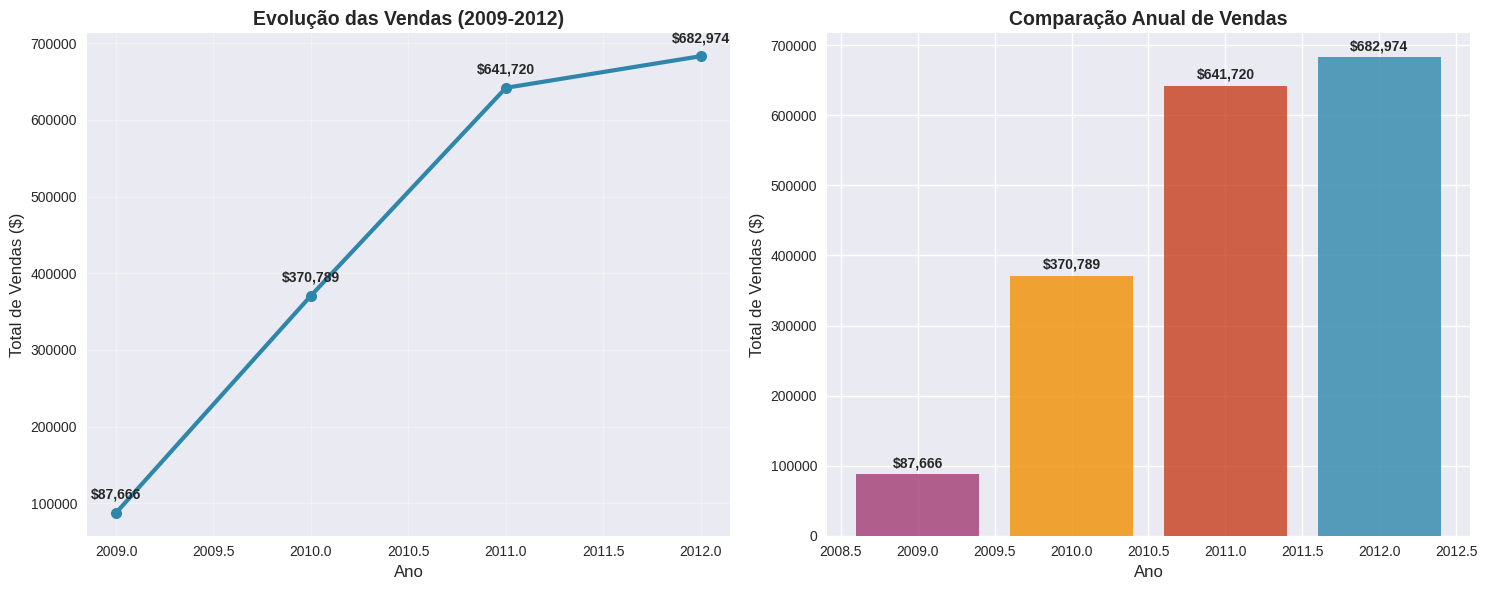


CONCLUS√ÉO: O faturamento CRESCEU 679.1% entre 2009 e 2012!
   ‚Ä¢ 2009: $87,666.29
   ‚Ä¢ 2012: $682,973.65


In [35]:
query_2009 = """
SELECT SUM(v.valor_vendas) AS total_2009
FROM vendas v
JOIN pedidos p ON v.pedido_id = p.id
WHERE EXTRACT(YEAR FROM p.data) = 2009;
"""

df_2009 = pd.read_sql(query_2009, engine)
print(f"Total vendido em 2009: ${df_2009['total_2009'].iloc[0]:,.2f}")

query_vendas_anos = """
SELECT EXTRACT(YEAR FROM p.data) AS ano,
       SUM(v.valor_vendas) AS total_vendas
FROM vendas v
JOIN pedidos p ON v.pedido_id = p.id
WHERE EXTRACT(YEAR FROM p.data) BETWEEN 2009 AND 2012
GROUP BY ano
ORDER BY ano;
"""

df_vendas_anos = pd.read_sql(query_vendas_anos, engine)
# display(df_vendas_anos)

# Gr√°fico de linha mostrando a evolu√ß√£o das vendas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Gr√°fico de linha
ax1.plot(df_vendas_anos['ano'], df_vendas_anos['total_vendas'], 
         marker='o', linewidth=3, markersize=8, color='#2E86AB')
ax1.set_title('Evolu√ß√£o das Vendas (2009-2012)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Ano', fontsize=12)
ax1.set_ylabel('Total de Vendas ($)', fontsize=12)
ax1.grid(True, alpha=0.3)

# Adicionar valores nas linhas
for i, v in enumerate(df_vendas_anos['total_vendas']):
    ax1.annotate(f'${v:,.0f}', (df_vendas_anos['ano'].iloc[i], v), 
                textcoords="offset points", xytext=(0,10), ha='center', fontweight='bold')

# Gr√°fico de barras para compara√ß√£o visual
bars = ax2.bar(df_vendas_anos['ano'], df_vendas_anos['total_vendas'], 
               color=['#A23B72', '#F18F01', '#C73E1D', '#2E86AB'], alpha=0.8)
ax2.set_title('Compara√ß√£o Anual de Vendas', fontsize=14, fontweight='bold')
ax2.set_xlabel('Ano', fontsize=12)
ax2.set_ylabel('Total de Vendas ($)', fontsize=12)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    ax2.annotate(f'${height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Calcular crescimento
crescimento = ((df_vendas_anos['total_vendas'].iloc[-1] - df_vendas_anos['total_vendas'].iloc[0]) / 
               df_vendas_anos['total_vendas'].iloc[0]) * 100

print(f"\nCONCLUS√ÉO: O faturamento CRESCEU {crescimento:.1f}% entre 2009 e 2012!")
print(f"   ‚Ä¢ 2009: ${df_vendas_anos['total_vendas'].iloc[0]:,.2f}")
print(f"   ‚Ä¢ 2012: ${df_vendas_anos['total_vendas'].iloc[-1]:,.2f}")

## 9 - Quais s√£o os principais clientes (vendas $) do segmento ‚ÄúCal√ßados Masculinos‚Äù (Men ÃÅs Footwear) no ano de 2012. Para quais cidades houve venda e quanto?

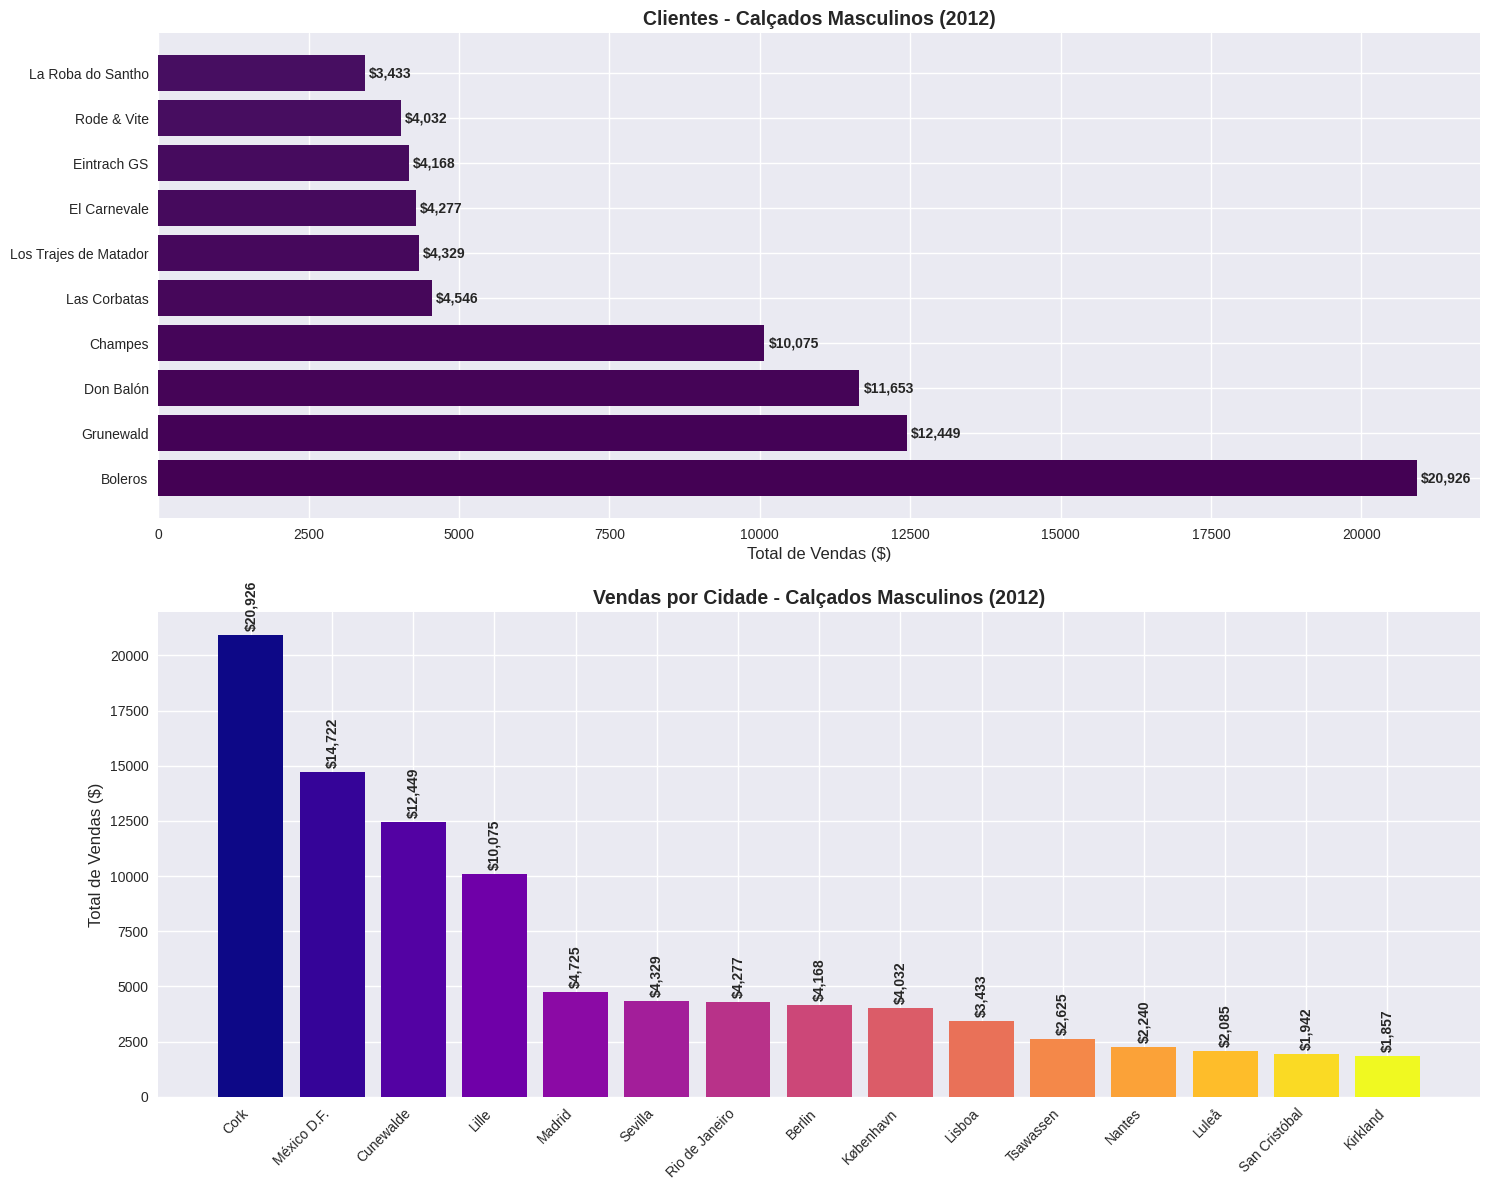


RESUMO - Cal√ßados Masculinos em 2012:
   ‚Ä¢ Total de clientes: 36
   ‚Ä¢ Total de cidades atendidas: 31
   ‚Ä¢ Faturamento total: $104,629.91
   ‚Ä¢ Maior cliente: Boleros ($20,926.43)
   ‚Ä¢ Melhor cidade: Cork ($20,926.43)


In [36]:
query_clientes_2012 = """
SELECT c.nome AS cliente,
       c.cidade,
       SUM(v.valor_vendas) AS total_vendas
FROM vendas v
JOIN pedidos p ON v.pedido_id = p.id
JOIN clientes c ON p.cliente_id = c.id
JOIN produtos pr ON v.produto_id = pr.id
JOIN categorias cat ON pr.categoria_id = cat.id
WHERE cat.nome = 'Men¬¥s Footwear'
  AND EXTRACT(YEAR FROM p.data) = 2012
GROUP BY c.nome, c.cidade
ORDER BY total_vendas DESC;
"""

df_clientes_2012 = pd.read_sql(query_clientes_2012, engine)
# display(df_clientes_2012.head(10))

# Gr√°ficos para an√°lise de clientes
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Top 10 clientes
top_10_clientes = df_clientes_2012.head(10)
bars1 = ax1.barh(range(len(top_10_clientes)), top_10_clientes['total_vendas'], 
                 color=plt.cm.viridis(range(len(top_10_clientes))))
ax1.set_yticks(range(len(top_10_clientes)))
ax1.set_yticklabels(top_10_clientes['cliente'])
ax1.set_title('Clientes - Cal√ßados Masculinos (2012)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Total de Vendas ($)', fontsize=12)

# Adicionar valores nas barras
for i, bar in enumerate(bars1):
    width = bar.get_width()
    ax1.annotate(f'${width:,.0f}',
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0), textcoords="offset points",
                ha='left', va='center', fontsize=10, fontweight='bold')

# Vendas por cidade
vendas_por_cidade = df_clientes_2012.groupby('cidade')['total_vendas'].sum().sort_values(ascending=False).head(15)

bars2 = ax2.bar(range(len(vendas_por_cidade)), vendas_por_cidade.values, 
                color=plt.cm.plasma(np.linspace(0, 1, len(vendas_por_cidade))))
ax2.set_xticks(range(len(vendas_por_cidade)))
ax2.set_xticklabels(vendas_por_cidade.index, rotation=45, ha='right')
ax2.set_title('Vendas por Cidade - Cal√ßados Masculinos (2012)', fontsize=14, fontweight='bold')
ax2.set_ylabel('Total de Vendas ($)', fontsize=12)

# Adicionar valores nas barras
for i, bar in enumerate(bars2):
    height = bar.get_height()
    ax2.annotate(f'${height:,.0f}',
                xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points",
                ha='center', va='bottom', fontsize=10, fontweight='bold', rotation=90)

plt.tight_layout()
plt.show()

print(f"\nRESUMO - Cal√ßados Masculinos em 2012:")
print(f"   ‚Ä¢ Total de clientes: {len(df_clientes_2012)}")
print(f"   ‚Ä¢ Total de cidades atendidas: {df_clientes_2012['cidade'].nunique()}")
print(f"   ‚Ä¢ Faturamento total: ${df_clientes_2012['total_vendas'].sum():,.2f}")
print(f"   ‚Ä¢ Maior cliente: {df_clientes_2012.iloc[0]['cliente']} (${df_clientes_2012.iloc[0]['total_vendas']:,.2f})")
print(f"   ‚Ä¢ Melhor cidade: {vendas_por_cidade.index[0]} (${vendas_por_cidade.iloc[0]:,.2f})")

## 10 - Na Europa, quanto que se vende ($) para cada pa√≠s?

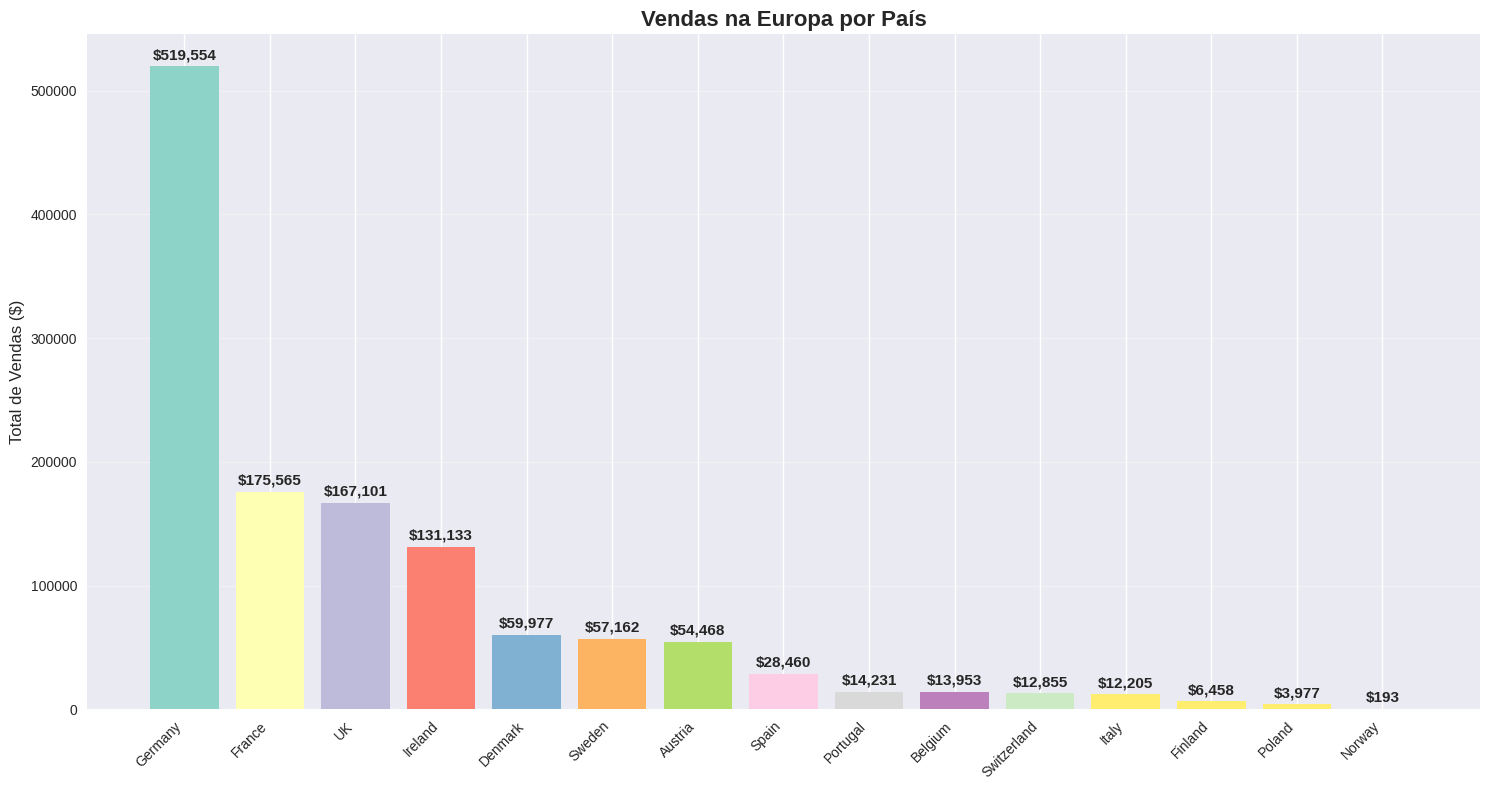


AN√ÅLISE EUROPEIA:
   ‚Ä¢ Pa√≠ses europeus identificados: 15
   ‚Ä¢ Total de vendas na Europa: $1,257,293.32
   ‚Ä¢ Melhor pa√≠s europeu: Germany ($519,553.87)
   ‚Ä¢ Participa√ß√£o do melhor pa√≠s: 41.3%


In [38]:
query_paises = """
SELECT pa.nome AS pais,
       SUM(v.valor_vendas) AS total_vendas
FROM vendas v
JOIN pedidos p ON v.pedido_id = p.id
JOIN clientes c ON p.cliente_id = c.id
JOIN paises pa ON c.pais_id = pa.id
GROUP BY pa.nome
ORDER BY total_vendas DESC;
"""

df_paises = pd.read_sql(query_paises, engine)
# display(df_paises)

# Identificar pa√≠ses europeus (baseado nos nomes comuns)
paises_europeus = ['Germany', 'France', 'Italy', 'Spain', 'UK', 'Netherlands', 
                   'Belgium', 'Austria', 'Switzerland', 'Portugal', 'Ireland', 'Denmark',
                   'Sweden', 'Norway', 'Finland', 'Poland', 'Czech Republic', 'Hungary']

df_europa = df_paises[df_paises['pais'].isin(paises_europeus)].copy()

if len(df_europa) > 0:
    # Gr√°fico de barras para pa√≠ses europeus
    plt.figure(figsize=(15, 8))
    
    bars = plt.bar(range(len(df_europa)), df_europa['total_vendas'], 
                   color=plt.cm.Set3(range(len(df_europa))))
    plt.xticks(range(len(df_europa)), df_europa['pais'], rotation=45, ha='right')
    plt.title('Vendas na Europa por Pa√≠s', fontsize=16, fontweight='bold')
    plt.ylabel('Total de Vendas ($)', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    
    # Adicionar valores nas barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.annotate(f'${height:,.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Gr√°fico de pizza interativo com Plotly
    fig_pie = px.pie(df_europa, values='total_vendas', names='pais', 
                     title='Distribui√ß√£o das Vendas na Europa',
                     color_discrete_sequence=px.colors.qualitative.Set3)
    fig_pie.update_traces(textposition='inside', textinfo='percent+label')
    fig_pie.update_layout(font=dict(size=14))
    fig_pie.show()
    
    print(f"\nAN√ÅLISE EUROPEIA:")
    print(f"   ‚Ä¢ Pa√≠ses europeus identificados: {len(df_europa)}")
    print(f"   ‚Ä¢ Total de vendas na Europa: ${df_europa['total_vendas'].sum():,.2f}")
    print(f"   ‚Ä¢ Melhor pa√≠s europeu: {df_europa.iloc[0]['pais']} (${df_europa.iloc[0]['total_vendas']:,.2f})")
    print(f"   ‚Ä¢ Participa√ß√£o do melhor pa√≠s: {(df_europa.iloc[0]['total_vendas']/df_europa['total_vendas'].sum())*100:.1f}%")
else:
    print("Nenhum pa√≠s europeu identificado nos dados. Mostrando todos os pa√≠ses:")
    
    # Gr√°fico para todos os pa√≠ses se n√£o houver pa√≠ses europeus identificados
    plt.figure(figsize=(15, 8))
    top_15_paises = df_paises.head(15)
    
    bars = plt.bar(range(len(top_15_paises)), top_15_paises['total_vendas'], 
                   color=plt.cm.viridis(np.linspace(0, 1, len(top_15_paises))))
    plt.xticks(range(len(top_15_paises)), top_15_paises['pais'], rotation=45, ha='right')
    plt.title('Top 15 Pa√≠ses por Vendas', fontsize=16, fontweight='bold')
    plt.ylabel('Total de Vendas ($)', fontsize=12)
    plt.grid(True, alpha=0.3, axis='y')
    
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.annotate(f'${height:,.0f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points",
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    plt.tight_layout()
    plt.show()